In [1]:
import pandas as pd
from prophet import Prophet
from plotnine import *

# Data Loading

In [2]:
df=pd.read_csv('/home/ubuntu/code/prophet/examples/example_wp_log_peyton_manning.csv')
df.loc[:,'ds']=pd.to_datetime(df.ds,format='%Y-%m-%d')
print(df.shape)
print(df.ds.min(),df.ds.max())
df.head(5)

(2905, 2)
2007-12-10 00:00:00 2016-01-20 00:00:00


,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


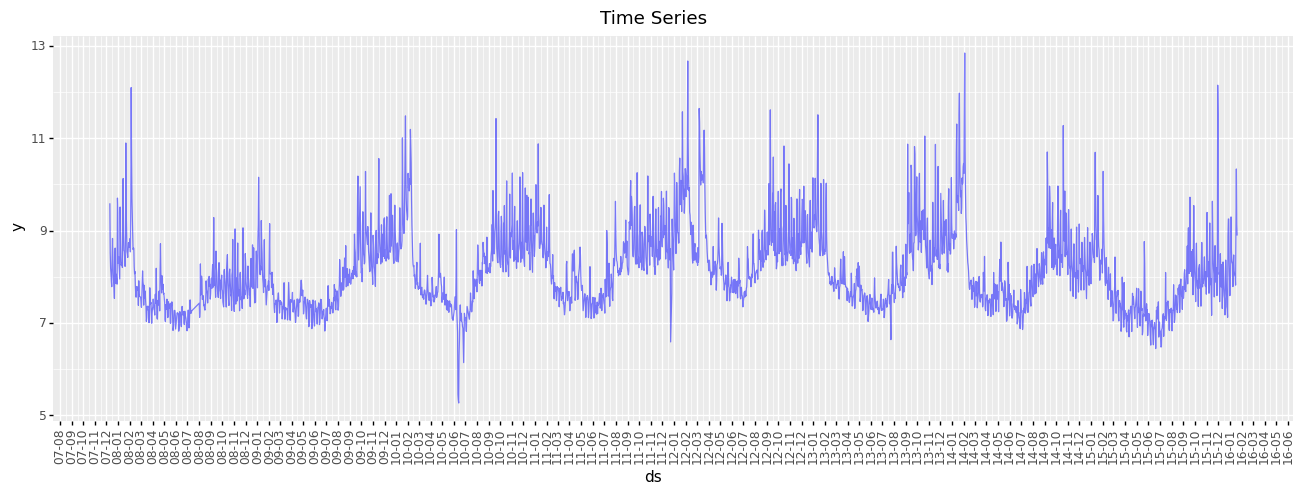

<ggplot: (8728448685249)>


In [3]:
## Reviewing
print(
    ggplot(df,aes('ds','y'))
    +geom_line(color='blue',alpha=0.5)
    +scale_x_datetime(date_breaks='1 month',date_labels='%y-%m')
    +theme(axis_text_x=element_text(angle=90),figure_size=(16,5))
    +labs(title='Time Series')

)

### Fitting 

In [4]:
## 1. fitting model
m=Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
## 2. Making future table
future=m.make_future_dataframe(periods=365)

In [7]:
## 3. Forecasting
forecast=m.predict(future)
print(forecast.shape)
forecast.head(5)

(3270, 19)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.042814,8.243033,9.484657,8.042814,8.042814,0.803143,0.803143,0.803143,0.352294,0.352294,0.352294,0.450849,0.450849,0.450849,0.0,0.0,0.0,8.845957
1,2007-12-11,8.041264,8.001766,9.167571,8.041264,8.041264,0.553211,0.553211,0.553211,0.119647,0.119647,0.119647,0.433564,0.433564,0.433564,0.0,0.0,0.0,8.594475
2,2007-12-12,8.039713,7.736118,8.986027,8.039713,8.039713,0.350553,0.350553,0.350553,-0.066661,-0.066661,-0.066661,0.417214,0.417214,0.417214,0.0,0.0,0.0,8.390266
3,2007-12-13,8.038162,7.746470,8.988043,8.038162,8.038162,0.329993,0.329993,0.329993,-0.072252,-0.072252,-0.072252,0.402244,0.402244,0.402244,0.0,0.0,0.0,8.368155
4,2007-12-14,8.036612,7.740749,9.006579,8.036612,8.036612,0.319483,0.319483,0.319483,-0.069578,-0.069578,-0.069578,0.389061,0.389061,0.389061,0.0,0.0,0.0,8.356095


# 01 Automatic Changepoint Detection

## 1.1 changepoints_range=0.8 [default] 

In [8]:
from prophet.plot import add_changepoints_to_plot

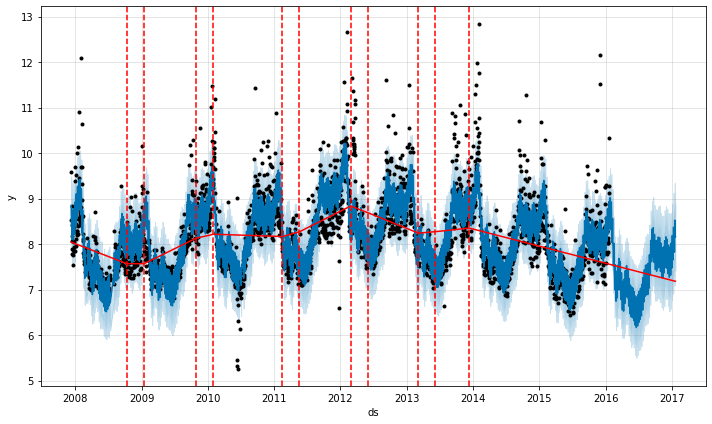

In [9]:
fig=m.plot(forecast) # 11 change points
a=add_changepoints_to_plot(fig.gca(),m,forecast) # default changepoints are only inferred for the first 80% of time series

## 1.2 changepoints=0.9 

### Preprocessing 

In [11]:
## 1. Fiting
m_cp8=Prophet(changepoint_range=0.9)
m_cp8.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [12]:
## 2. Forecasting
forecast_cp8=m_cp8.predict(future)
print(forecast_cp8.shape)

(3270, 19)


### Reviewing 

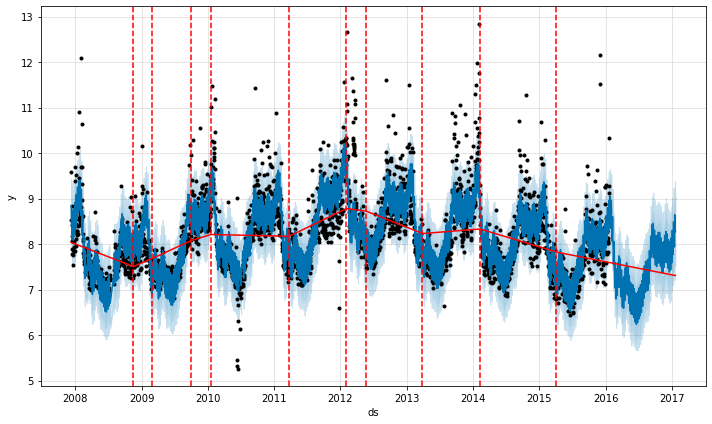

In [14]:
fig_cp8=m_cp8.plot(forecast_cp8)
a_cp8=add_changepoints_to_plot(fig_cp8.gca(),m_cp8,forecast_cp8) # 10 change pooints

# 02 Adjusting Trend Flexibility

## 2.1 High scale - more flexible

In [16]:
## 1. Fitting
m_scale05=Prophet(changepoint_prior_scale=0.5)
forecast_scale_05=m_scale05.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


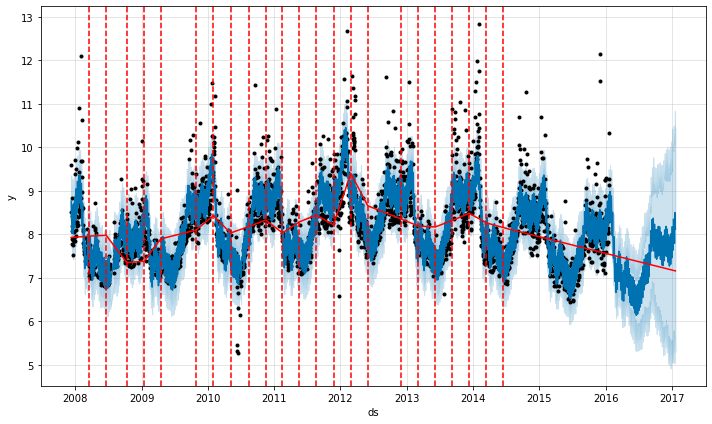

In [19]:
## 2. Viz
fig_scale05=m_scale05.plot(forecast_scale_05)
a_scale_05=add_changepoints_to_plot(fig_scale05.gca(),m_scale05,forecast_scale_05)

## 2.2 Low scale - less flexible

In [20]:
## 1. Fitting
m_sc001=Prophet(changepoint_prior_scale=0.001)
forecast_sc001=m_sc001.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


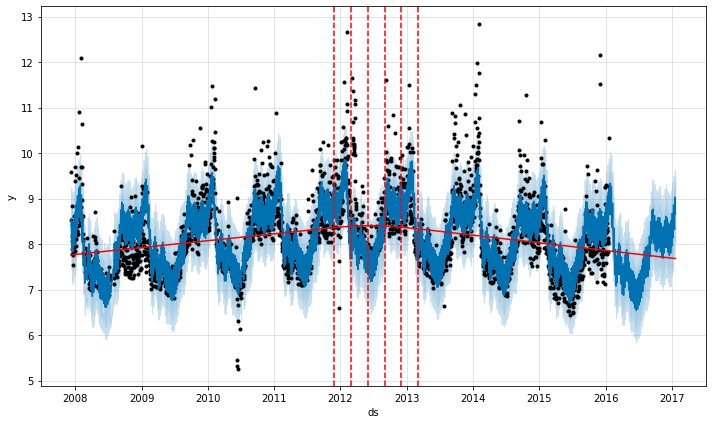

In [21]:
## 2. Viz
fig_sc001=m_sc001.plot(forecast_sc001)
a_sc001=add_changepoints_to_plot(fig_sc001.gca(),
                                 m_sc001,
                                 forecast_sc001)

# 03 Specifying the locations of the changepoints

## Fitting

In [23]:
m_cp=Prophet(changepoints=['2014-01-01'])
forecast_cp=m_cp.fit(df).predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Viz

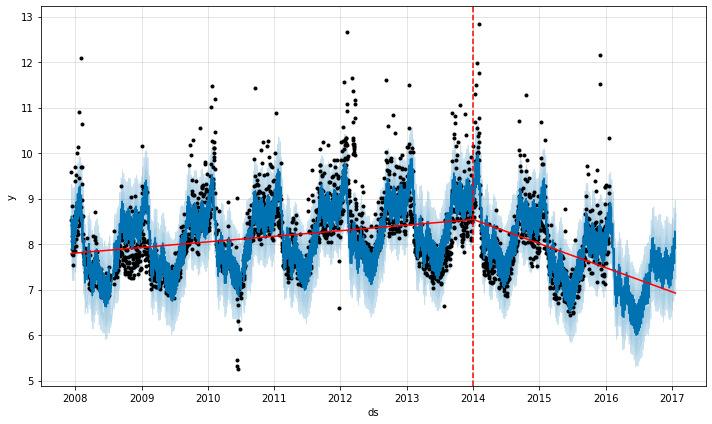

In [24]:
fig_cp=m_cp.plot(forecast_cp)
a_cp=add_changepoints_to_plot(fig_cp.gca(),
                              m_cp,
                              forecast_cp
                             )

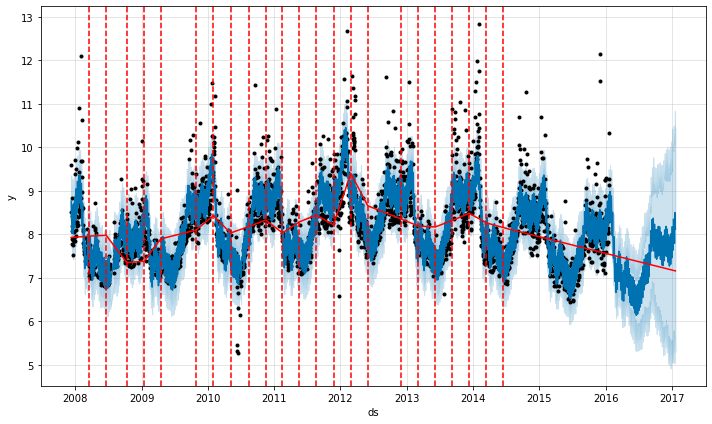

In [25]:
## Comparing
fig_scale05=m_scale05.plot(forecast_scale_05)
a_scale_05=add_changepoints_to_plot(fig_scale05.gca(),m_scale05,forecast_scale_05)